## Koppen Climate Zones

netCDF files corresponding to the Koppen climate zones were downloaded from:

Beck, Hylke E.; McVicar, Tim; Vergopolan, Noemi; Berg, Alexis; Lutsko, Nicholas; Dufour, Ambroise; et al. (2022).
High-resolution (1 km) Köppen-Geiger maps for 1901–2099 based on constrained CMIP6 projections. figshare. Dataset.
https://doi.org/10.6084/m9.figshare.21789074.v1

    1:  Af   Tropical, rainforest
    2:  Am   Tropical, monsoon
    3:  Aw   Tropical, savannah
    4:  BWh  Arid, desert, hot
    5:  BWk  Arid, desert, cold
    6:  BSh  Arid, steppe, hot
    7:  BSk  Arid, steppe, cold
    8:  Csa  Temperate, dry summer, hot summer
    9:  Csb  Temperate, dry summer, warm summer
    10: Csc  Temperate, dry summer, cold summer
    11: Cwa  Temperate, dry winter, hot summer
    12: Cwb  Temperate, dry winter, warm summer
    13: Cwc  Temperate, dry winter, cold summer
    14: Cfa  Temperate, no dry season, hot summer
    15: Cfb  Temperate, no dry season, warm summer
    16: Cfc  Temperate, no dry season, cold summer
    17: Dsa  Cold, dry summer, hot summer
    18: Dsb  Cold, dry summer, warm summer 
    19: Dsc  Cold, dry summer, cold summer
    20: Dsd  Cold, dry summer, very cold winter
    21: Dwa  Cold, dry winter, hot summer
    22: Dwb  Cold, dry winter, warm summer
    23: Dwc  Cold, dry winter, cold summer
    24: Dwd  Cold, dry winter, very cold winter
    25: Dfa  Cold, no dry season, hot summer
    26: Dfb  Cold, no dry season, warm summer
    27: Dfc  Cold, no dry season, cold summer
    28: Dfd  Cold, no dry season, very cold winter
    29: ET   Polar, tundra
    30: EF   Polar, frost

Please cite Beck et al. (2023) when using the maps in any publication:

   Beck, H. E., T. R. McVicar, N. Vergopolan, A. Berg, N. J. Lutsko, A. Dufour,
   Z. Zeng, X. Jiang, A. I. J. M. van Dijk, and D. G. Miralles. High-resolution
   (1 km) Köppen-Geiger maps for 1901–2099 based on constrained CMIP6 
   projections, Scientific Data 10, 724 (2023)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import xesmf as xe

In [2]:
def xesmf_regrid(ds, ds_grid, variable=None):
    """Regrid data using xesmf.
    
    Parameters
    ----------
    ds : xarray Dataset
        Dataset to be regridded
    ds_grid : xarray Dataset
        Dataset containing target horizontal grid
    variable : str, optional
        Variable to restore attributes for
    
    Returns
    -------
    ds : xarray Dataset
    
    """
    
    global_attrs = ds.attrs
    if variable:
        var_attrs = ds[variable].attrs
    regridder = xe.Regridder(ds, ds_grid, 'nearest_s2d')
    ds = regridder(ds)
    ds.attrs = global_attrs
    if variable:
        ds[variable].attrs = var_attrs

    return ds

In [3]:
ds_cmip = xr.open_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Amon/pr/gn/latest/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc')

In [4]:
ds_koppen_coarse = xr.open_dataset('/g/data/xv83/dbi599/treasury/koppen/koppen_geiger_1p0_1991-2020.nc')

In [5]:
ds_koppen_cmip = xesmf_regrid(ds_koppen_coarse, ds_cmip, variable='kg_class')

In [6]:
ds_koppen_cmip = ds_koppen_cmip.compute()

In [7]:
ds_koppen_cmip

<xarray.Dataset> Size: 225kB
Dimensions:        (lat: 145, lon: 192)
Coordinates:
  * lat            (lat) float64 1kB -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * lon            (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
Data variables:
    kg_class       (lat, lon) float32 111kB 30.0 30.0 30.0 30.0 ... 0.0 0.0 0.0
    kg_confidence  (lat, lon) float32 111kB 99.0 99.0 99.0 99.0 ... 0.0 0.0 0.0
Attributes:
    history:  Created on 2024-02-19 07:57

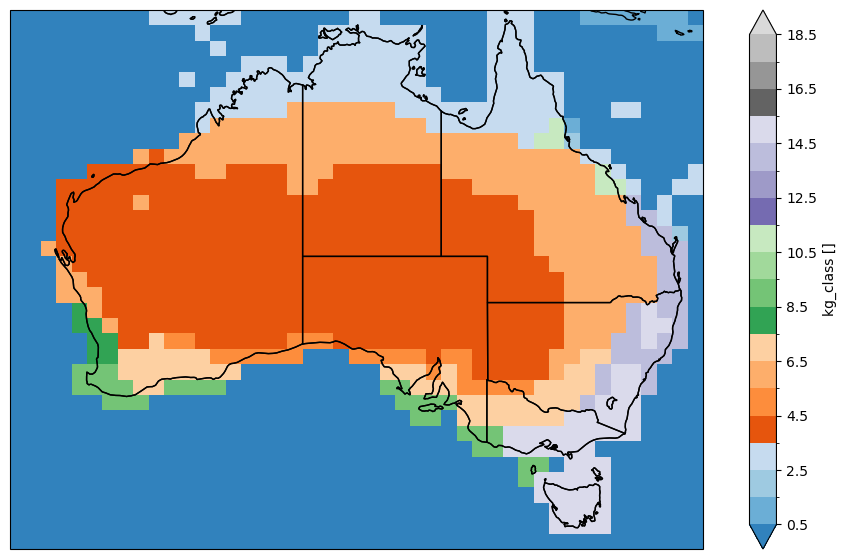

In [8]:
fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_koppen_coarse['kg_class'].plot.imshow(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='tab20c',
    levels=np.arange(0.5, 19, 1),
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.set_extent([110, 155, -10, -45], crs=ccrs.PlateCarree())
plt.show()

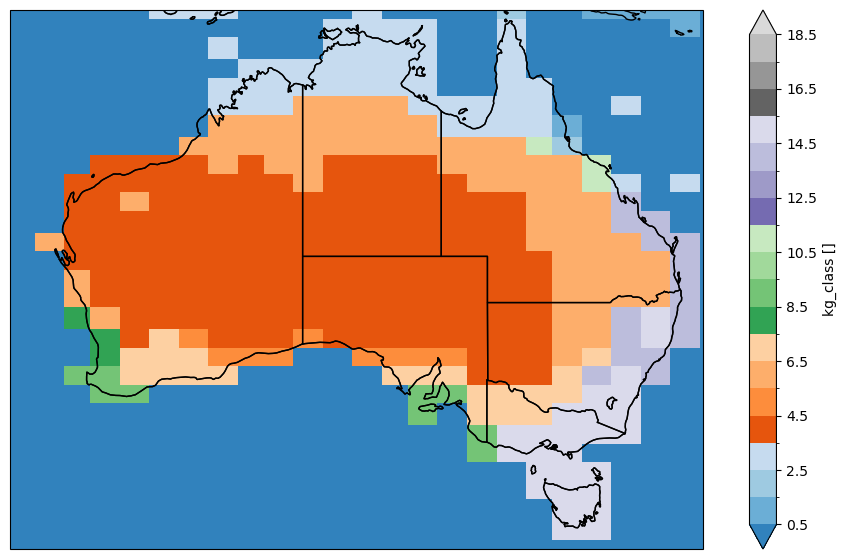

In [9]:
fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_koppen_cmip['kg_class'].plot.imshow(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='tab20c',
    levels=np.arange(0.5, 19, 1),
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.set_extent([110, 155, -10, -45], crs=ccrs.PlateCarree())
plt.show()

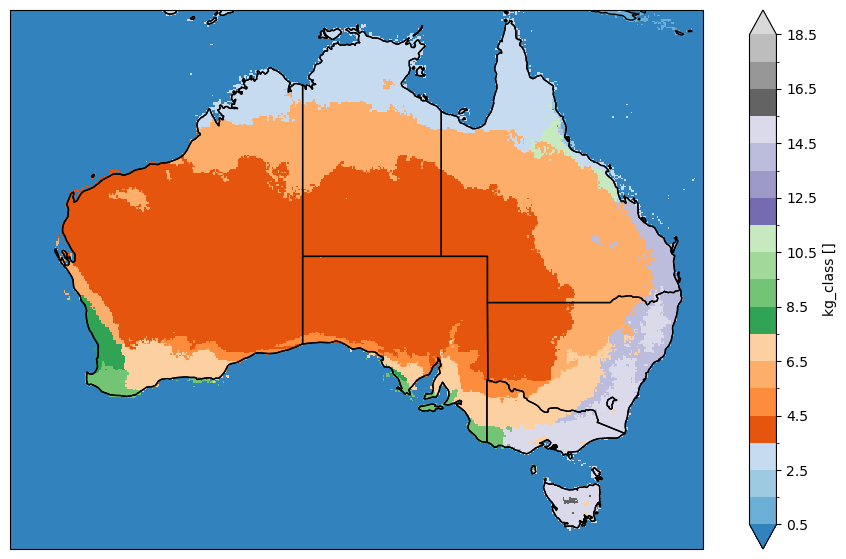

In [11]:
fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds = xr.open_dataset('/g/data/xv83/dbi599/treasury/koppen/koppen_geiger_0p1_1991-2020.nc')
ds['kg_class'].plot.imshow(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='tab20c',
    levels=np.arange(0.5, 19, 1),
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.set_extent([110, 155, -10, -45], crs=ccrs.PlateCarree())
plt.show()

Mask the following:

    4:  BWh  Arid, desert, hot                    
    5:  BWk  Arid, desert, cold                   
    6:  BSh  Arid, steppe, hot                     
    7:  BSk  Arid, steppe, cold 